In [1]:
from model_phantom import *

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


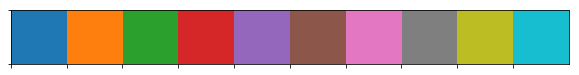

In [3]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [4]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time');

## Examples

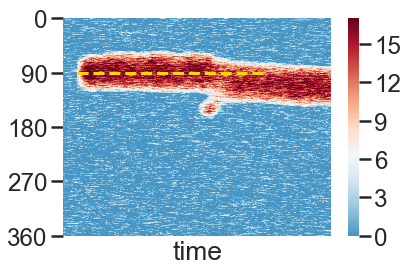

In [78]:
fee=1
fei=1
fie=1
fii=1


on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)


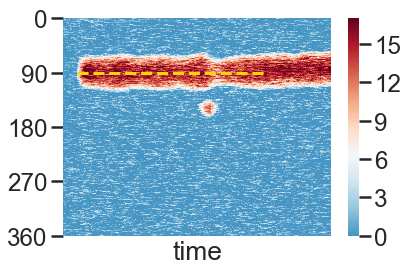

In [77]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)


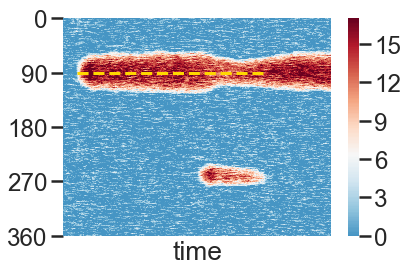

In [75]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)


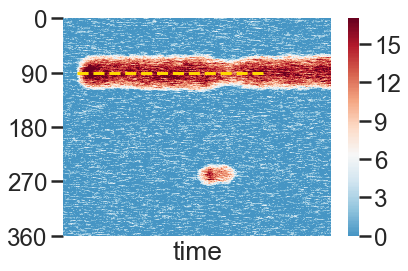

In [81]:
fee=1
fei=1
fie=1
fii=1

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)


In [47]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

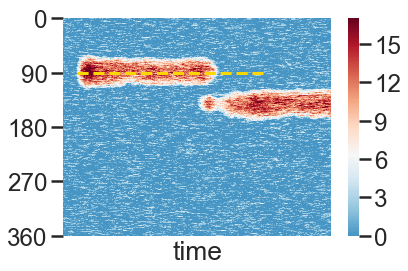

In [79]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)


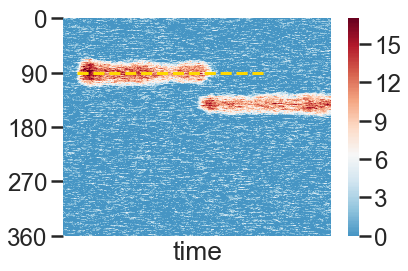

In [84]:

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=52, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)

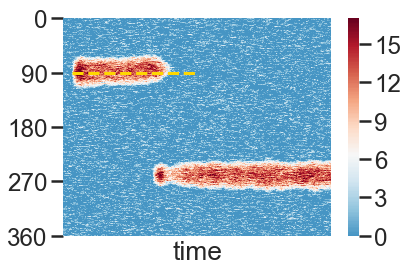

In [111]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)

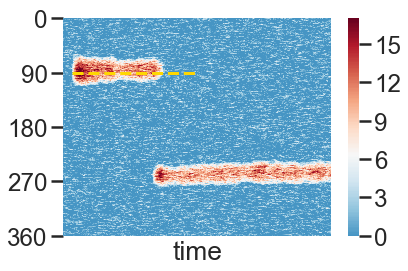

In [110]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)

hemap(on)

## Simulations

In [87]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 
#print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

ON_1_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

Number cores: 7


In [88]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 
#print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

OFF_1_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

Number cores: 7


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


21.2068 16.1772


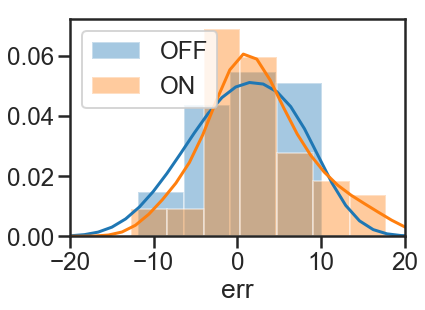

In [121]:
err1_on_f = pd.DataFrame([ON_1_far[i][1] for i in range(len(ON_1_far))])
err1_on_f.columns=['err']
err1_on_f['abs_err']=abs(err1_on_f['err'])
err1_on_f['stimulation']='ON'
err1_on_f['distance']='far'
err1_on_f['order']='1st'


err1_off_f = pd.DataFrame([OFF_1_far[i][1] for i in range(len(OFF_1_far))])
err1_off_f.columns=['err']
err1_off_f['abs_err']=abs(err1_off_f['err'])
err1_off_f['stimulation']='OFF'
err1_off_f['distance']='far'
err1_off_f['order']='1st'


sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.xlim(-20,20)
print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

In [94]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 
#print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

ON_1_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [95]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 
#print('Number cores: '+ str(numcores))

fee=1
fei=1
fie=1
fii=1

OFF_1_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=2000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


5.463000000000001 13.541599999999999


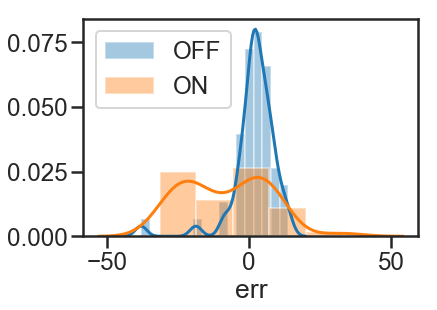

In [120]:
err1_on_c = pd.DataFrame([ON_1_close[i][1] for i in range(len(ON_1_close))])
err1_on_c.columns=['err']
err1_on_c['abs_err']=abs(err1_on_c['err'])
err1_on_c['stimulation']='ON'
err1_on_c['distance']='close'
err1_on_c['order']='1st'

err1_off_c = pd.DataFrame([OFF_1_close[i][1] for i in range(len(OFF_1_close))])
err1_off_c.columns=['err']
err1_off_c['abs_err']=abs(err1_off_c['err'])
err1_off_c['stimulation']='OFF'
err1_off_c['distance']='close'
err1_off_c['order']='1st'


sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())

In [112]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 

fee=0.94
fei=0.92
fie=1.14
fii=1.08

ON_2_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [113]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 

fee=0.94
fei=0.92
fie=1.14
fii=1.08

OFF_2_far = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


19.1898 14.9768


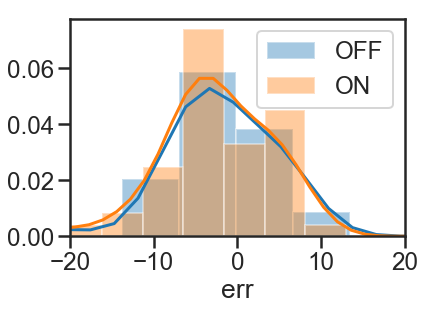

In [128]:
err2_on_f = pd.DataFrame([ON_2_far[i][2] for i in range(len(ON_2_far))])
err2_on_f.columns=['err']
err2_on_f['abs_err']=abs(err2_on_f['err'])
err2_on_f['stimulation']='ON'
err2_on_f['distance']='far'
err2_on_f['order']='2nd'


err2_off_f = pd.DataFrame([OFF_2_far[i][2] for i in range(len(OFF_2_far))])
err2_off_f.columns=['err']
err2_off_f['abs_err']=abs(err2_off_f['err'])
err2_off_f['stimulation']='OFF'
err2_off_f['distance']='far'
err2_off_f['order']='2nd'



sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.xlim(-20,20)
print(err2_off_f.abs_err.mean(), err2_on_f.abs_err.mean())

In [122]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 

fee=0.94
fei=0.92
fie=1.14
fii=1.08

ON_2_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=0.08, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

In [123]:
n_simuls=50
numcores = multiprocessing.cpu_count() -1 

fee=0.94
fei=0.92
fie=1.14
fii=1.08

OFF_2_close = Parallel(n_jobs = numcores)(delayed(model)(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2.5, phantom_onset=50000, phnatom_duration=100)  for n in range(n_simuls)) 

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


15.405599999999998 33.8628


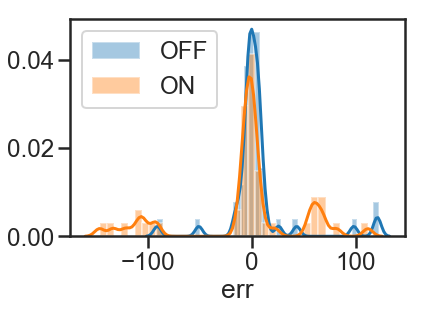

In [133]:
err2_on_c = pd.DataFrame([ON_2_close[i][2] for i in range(len(ON_2_close))])
err2_on_c.columns=['err']
err2_on_c['abs_err']=abs(err2_on_c['err'])
err2_on_c['stimulation']='ON'
err2_on_c['distance']='close'
err2_on_c['order']='2nd'


err2_off_c = pd.DataFrame([OFF_2_close[i][2] for i in range(len(OFF_2_close))])
err2_off_c.columns=['err']
err2_off_c['abs_err']=abs(err2_off_c['err'])
err2_off_c['stimulation']='OFF'
err2_off_c['distance']='close'
err2_off_c['order']='2nd'


sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
#plt.xlim(-20,20)
print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

In [135]:
df = pd.concat([err2_off_c, err2_on_c, err2_off_f, err2_off_c, 
               err1_off_c, err1_on_c, err1_off_f, err1_off_c], ignore_index=True)

df=df.loc[df['abs_err']<50]
